<a href="https://www.kaggle.com/code/erayramazankuloglu/game-project?scriptVersionId=157551803" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np


df=pd.read_csv("/kaggle/input/video-game-sales-and-ratings/Video_Games.csv")


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

In [2]:
#1)Sales Performance
#For this project we need a feew columns.We will create a new dataframe with these columns.

geographical_df = df[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Genre']]
geographical_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Global_Sales  16928 non-null  float64
 1   NA_Sales      16928 non-null  float64
 2   EU_Sales      16928 non-null  float64
 3   JP_Sales      16928 non-null  float64
 4   Other_Sales   16928 non-null  float64
 5   Genre         16926 non-null  object 
dtypes: float64(5), object(1)
memory usage: 793.6+ KB


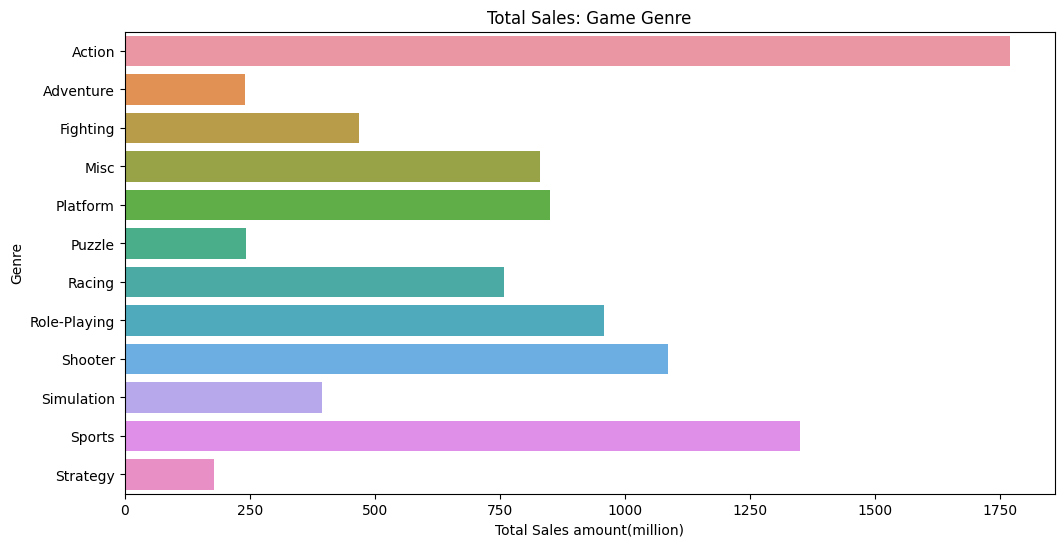

In [3]:
#Let's see what types of games sell and how much
import matplotlib.pyplot as plt
import seaborn as sns

total_sales_by_genre = geographical_df.groupby('Genre')[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
average_sales_by_genre = geographical_df.groupby('Genre')[['Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x='Global_Sales', y='Genre', data=total_sales_by_genre.reset_index())
plt.title("Total Sales: Game Genre")
plt.xlabel("Total Sales amount(million)")
plt.ylabel("Genre")
plt.show()


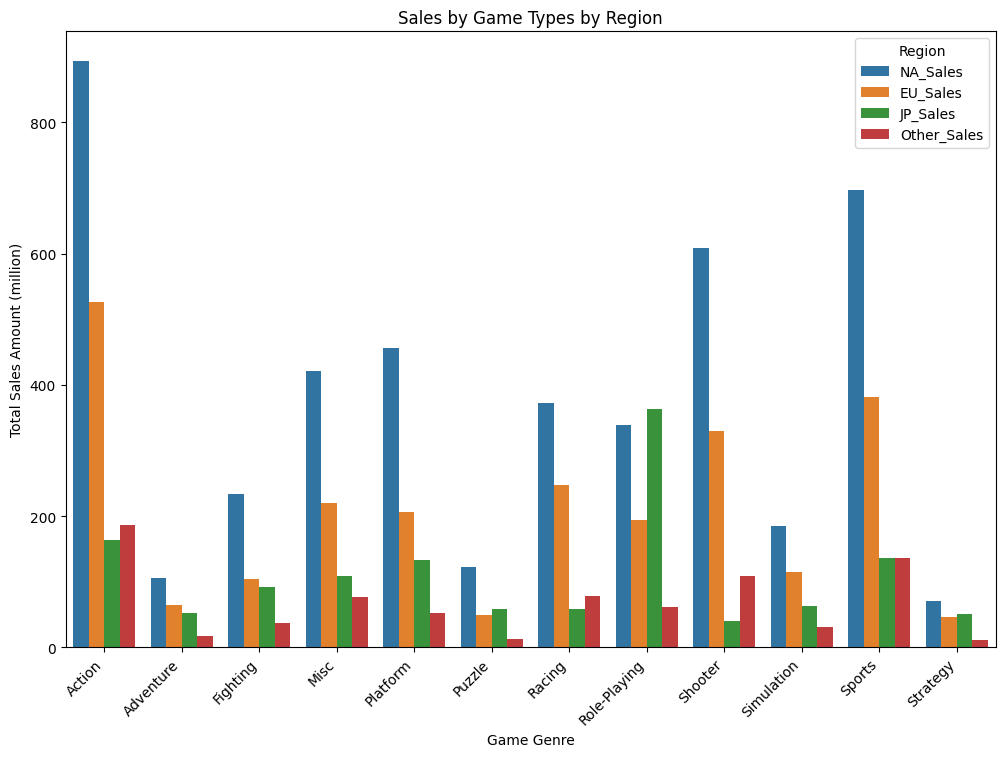

Sales by Game Types by Region
NA_Sales             Action
EU_Sales             Action
JP_Sales       Role-Playing
Other_Sales          Action
dtype: object


!!!!!!!!
***By looking at this graph, we can see which type sells more in which region. Based on this, a strategy can be determined by seeing what is popular in which region.
!!!!!!!!


In [4]:
#Now let's look at which game types sell best regionally.

# Bölge bazında toplam satışları ve oyun türlerini grupla
sales_by_genre_region = geographical_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

most_sold_genre_by_region = sales_by_genre_region.idxmax(axis=0)

plt.figure(figsize=(12, 8))
sns.barplot(x='Genre', y='value', hue='variable', data=pd.melt(sales_by_genre_region.reset_index(), id_vars='Genre'))
plt.title("Sales by Game Types by Region")
plt.xlabel("Game Genre")
plt.ylabel("Total Sales Amount (million)")
plt.legend(title='Region', loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.show()

print("Sales by Game Types by Region")
print(most_sold_genre_by_region)


print("\n\n!!!!!!!!")
print("***By looking at this graph, we can see which type sells more in which region. Based on this, a strategy can be determined by seeing what is popular in which region.")
print("!!!!!!!!")

In [5]:
#2)Genre or platform preference:

#For this we need to separate the necessary columns

genre_df = df[['Name', 'Platform', 'Genre', 'Publisher','Global_Sales']]
#genre_df.info()

genre_df_cleaned = genre_df.dropna()
genre_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16871 entries, 0 to 16927
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16871 non-null  object 
 1   Platform      16871 non-null  object 
 2   Genre         16871 non-null  object 
 3   Publisher     16871 non-null  object 
 4   Global_Sales  16871 non-null  float64
dtypes: float64(1), object(4)
memory usage: 790.8+ KB


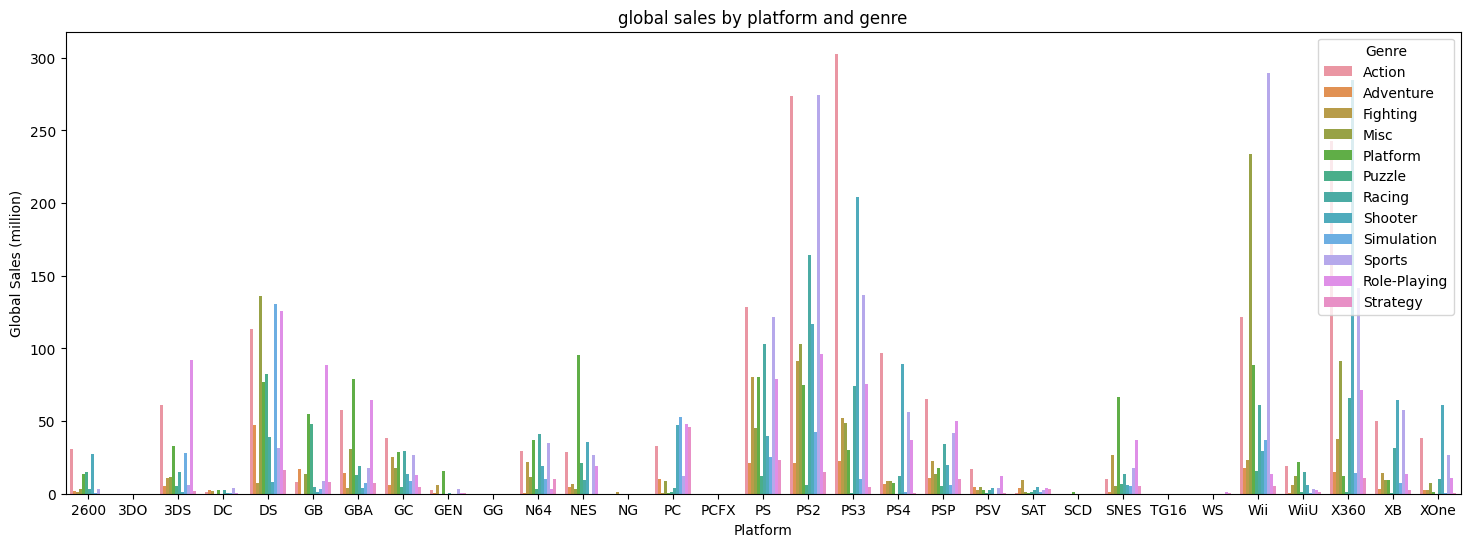

In [6]:

grouped_df = genre_df_cleaned.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()

plt.figure(figsize=(18, 6))
sns.barplot(x='Platform', y='Global_Sales', hue='Genre', data=grouped_df)
plt.title('global sales by platform and genre')
plt.xlabel('Platform')
plt.ylabel('Global Sales (million)')
plt.show()

#Here we can see which genre is more popular globally on which platform and follow a strategy accordingly.

0.5806276909318174

 



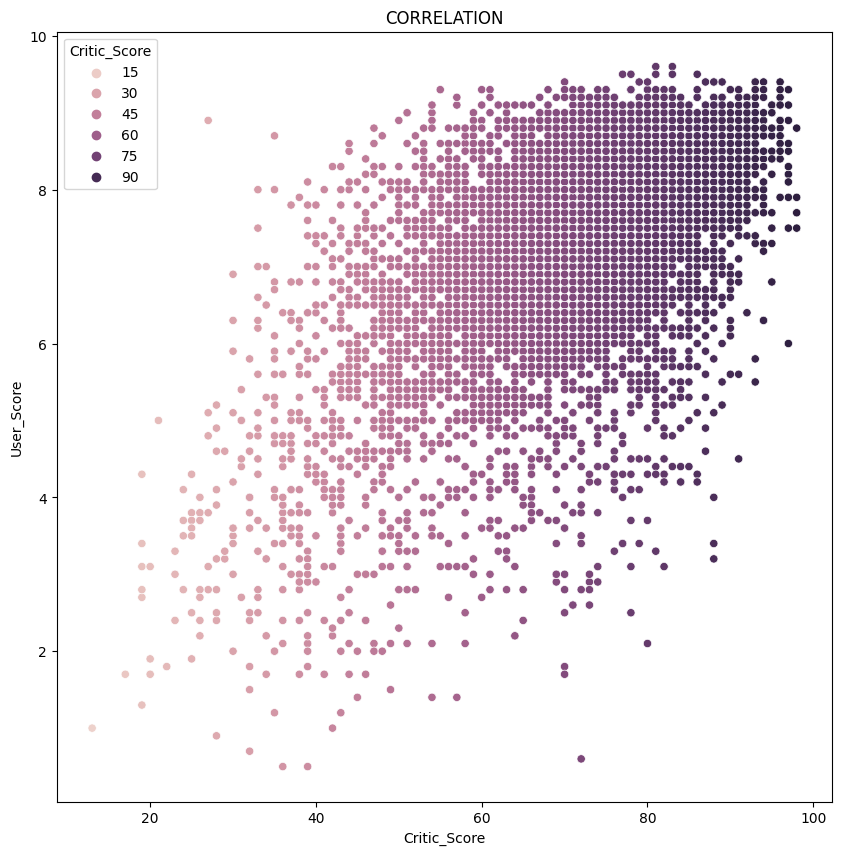

In [7]:
#3)Critics vs User Scores: Fine gameplay with distribution between critics and user ratings.
#We will also look at the effects of crises on sales.
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df_cleaned=df.dropna(subset=['Critic_Score','User_Score'])

correlation=df_cleaned['Critic_Score'].corr(df_cleaned['User_Score'])
print(correlation)

print("\n \n")
plt.figure(figsize=(10,10))
sns.scatterplot(x='Critic_Score',y='User_Score', hue=df_cleaned['Critic_Score'],data=df_cleaned)
plt.title("CORRELATION")
plt.xlabel("Critic_Score")
plt.ylabel("User_Score")
plt.show()


In [8]:
subset_df = df[['Critic_Score', 'User_Score', 'Global_Sales']]
subset_df = subset_df.dropna()

# Calculate correlation between sales and critic ratings and user ratings
correlation_sales_critic = subset_df['Global_Sales'].corr(subset_df['Critic_Score'])
correlation_sales_user = subset_df['Global_Sales'].corr(subset_df['User_Score'])

print("Correlation Between Sales and Critic Scores:", correlation_sales_critic)
print("Correlation Between Sales and User Ratings:", correlation_sales_user)

#We can see players more attention to critics' comments

Correlation Between Sales and Critic Scores: 0.23847056445023526
Correlation Between Sales and User Ratings: 0.09137644884853868


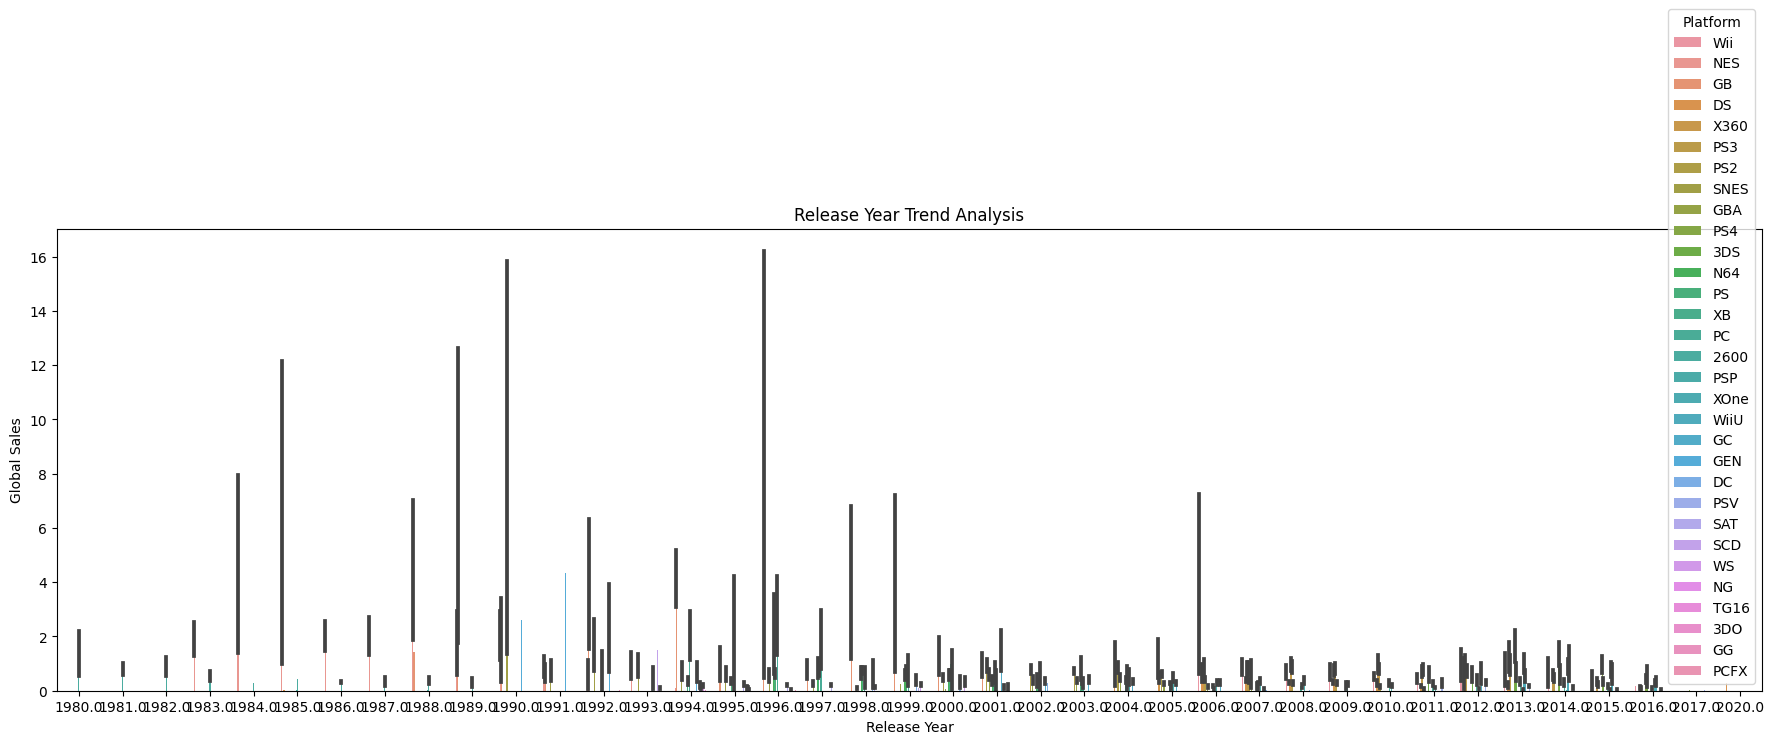

In [9]:
#4)Release Year Trend Analysis

new_df=df[["Year_of_Release","Platform","Global_Sales"]]

trend_df=new_df.dropna()
#trend_df.info()

#Sales changes of platforms by year
plt.figure(figsize=(22, 6))
sns.barplot(x='Year_of_Release', y='Global_Sales', hue='Platform', data=trend_df)
plt.title('Release Year Trend Analysis')
plt.xlabel('Release Year')
plt.ylabel('Global Sales')
plt.show()


/tmp/ipykernel_19/316990522.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trendgenre_df['Year_of_Release'] = trendgenre_df['Year_of_Release'].astype(int)


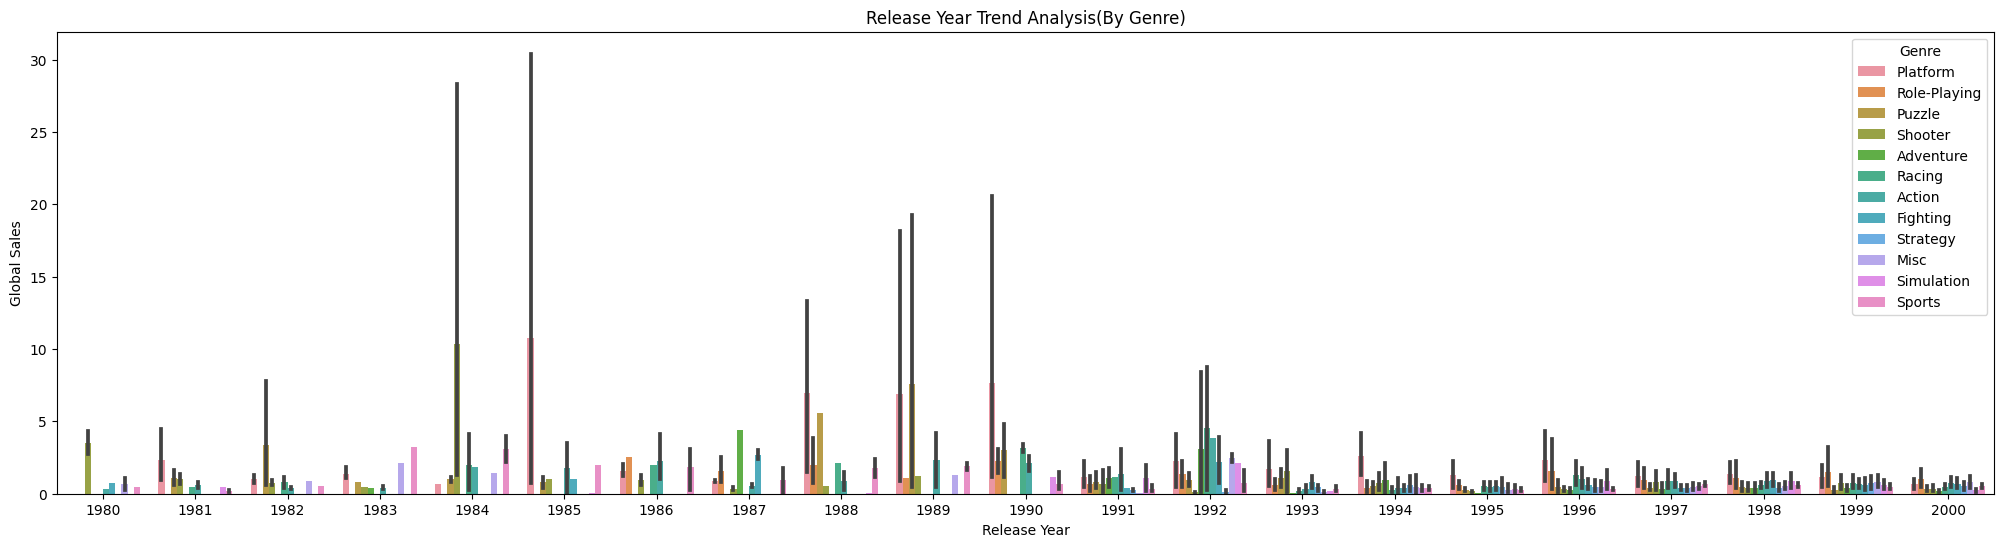

In [10]:
new2_df=df[["Year_of_Release","Genre","Global_Sales"]]


trendgenre_df=new2_df.dropna()
trendgenre_df['Year_of_Release'] = trendgenre_df['Year_of_Release'].astype(int)
subset_df = trendgenre_df[(trendgenre_df['Year_of_Release'] >= 1980) & (trendgenre_df['Year_of_Release'] <= 2000)]

#Since our data set is too large, I divided it into two and graphed it.


#Sales changes of platforms by year(part 1)
plt.figure(figsize=(25, 6))
sns.barplot(x='Year_of_Release', y='Global_Sales', hue='Genre', data=subset_df)
plt.title('Release Year Trend Analysis(By Genre)')
plt.xlabel('Release Year')
plt.ylabel('Global Sales')
plt.show()


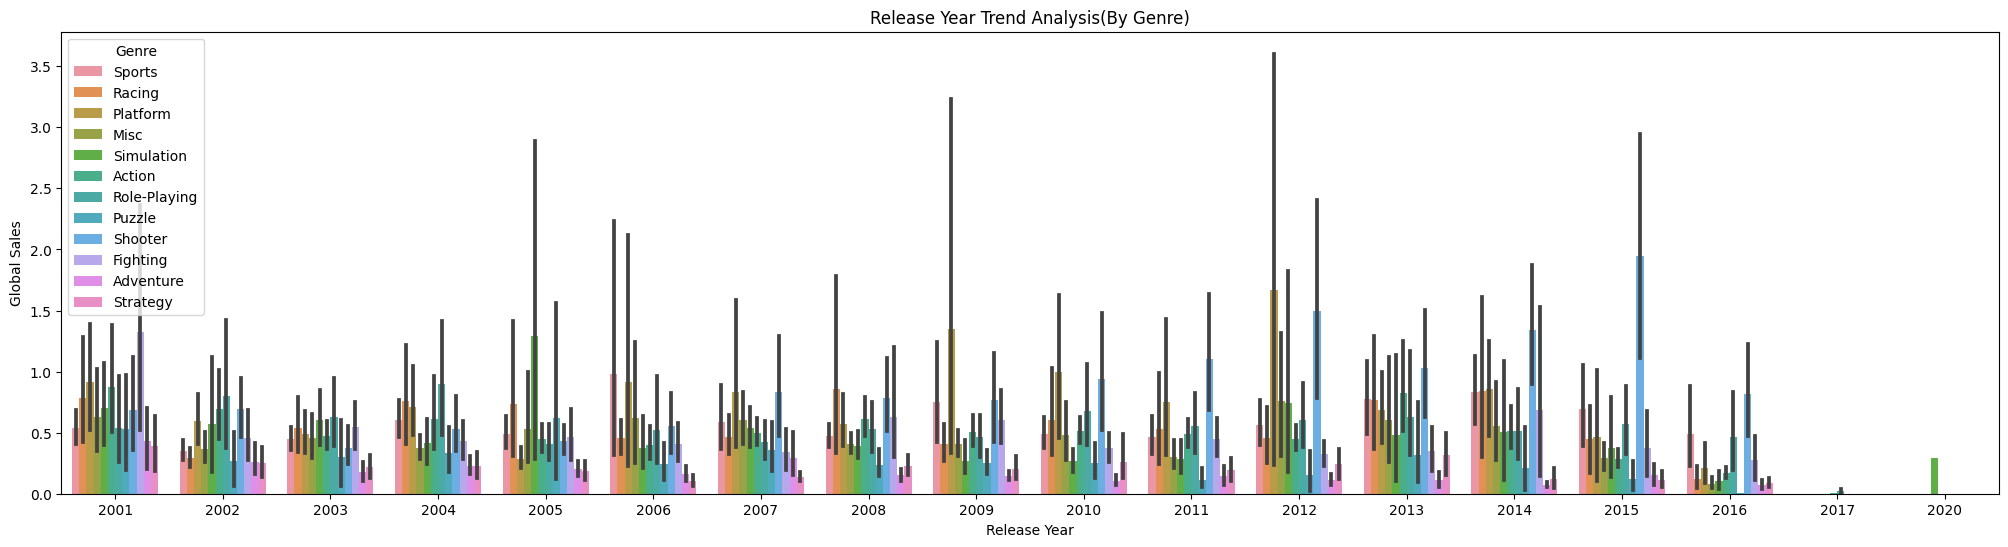

In [11]:
subset_df = trendgenre_df[(trendgenre_df['Year_of_Release'] >= 2001) & (trendgenre_df['Year_of_Release'] <= 2020)]

#Since our data set is too large, I divided it into two and graphed it.


#Sales changes of platforms by year(part 2)
plt.figure(figsize=(25, 6))
sns.barplot(x='Year_of_Release', y='Global_Sales', hue='Genre', data=subset_df)
plt.title('Release Year Trend Analysis(By Genre)')
plt.xlabel('Release Year')
plt.ylabel('Global Sales')
plt.show()
